In [2]:
import matplotlib.pyplot as plt
import re
import numpy as np

In [3]:
def extract_floats(s):
    # Regular expression for matching floats
    pattern = r"[-+]?[0-9]*\.?[0-9]+"
    # Find all matches in the string
    matches = re.findall(pattern, s)
    # Convert all matches to float
    floats = [float(match) for match in matches]
    return floats

In [4]:
def read_file(file_path, results):
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            if "Data ratio" in line:
                # Get the value after ":"
                line = line.split(":")[2].strip()
                data_ratio = extract_floats(line.split(",")[0].strip())[0]
                data_volume = extract_floats(line.split(",")[1].strip())[0]
                accuracy = extract_floats(line.split(",")[3].strip())[0]
                if data_volume not in results:
                    results[data_volume] = [accuracy]
                else:
                    results[data_volume].append(accuracy)
        return results

In [13]:
model_name = 'moco-v1'

In [14]:
file_directory = "../../logs/ssl/admm-lda/"
source = 'cifar10'
target = 'stl'
seeds = [1, 2, 3, 4, 5]
ntp = {}
for s in seeds:
    org_path = file_directory + f"{model_name}/{s}/admm_" + source + "_to_" + target + ".log"
    org_dic = read_file(org_path, ntp)
print(ntp)

{5.0: [0.24025, 0.221, 0.198875, 0.214, 0.201625], 10.0: [0.190375, 0.204375, 0.187875, 0.18325, 0.187125], 25.0: [0.30025, 0.309, 0.310875, 0.302, 0.29525], 40.0: [0.33775, 0.3095, 0.303875, 0.300125, 0.3165], 50.0: [0.337, 0.34375, 0.34675, 0.31725, 0.350875], 250.0: [0.4055, 0.437875, 0.406, 0.399, 0.421875], 500.0: [0.521125, 0.508875, 0.4325, 0.4845, 0.524875], 1000.0: [0.586875, 0.5835, 0.57175, 0.56725, 0.58525], 2500.0: [0.67225, 0.67625, 0.644375, 0.649625, 0.67], 5000.0: [0.6915, 0.70225, 0.68175, 0.673625, 0.697375]}


In [15]:
file_directory = "../../logs/ssl/original/"
source = 'cifar10'
target = 'stl'

org = {}
for s in seeds:
    org_path = file_directory + f"{model_name}/{s}/admm_" + source + "_to_" + target + ".log"
    org_dic = read_file(org_path, org)
print(org)

{5.0: [0.178125, 0.154, 0.179375, 0.152375, 0.18, 0.151625, 0.179625, 0.155125, 0.178875, 0.154375], 10.0: [0.174875, 0.188125, 0.1765, 0.186125, 0.170125, 0.195625, 0.180125, 0.193625, 0.173875, 0.185], 25.0: [0.25475, 0.25175, 0.256, 0.247, 0.254625, 0.255375, 0.2485, 0.249125, 0.251375, 0.2465], 40.0: [0.301, 0.300125, 0.297875, 0.304, 0.3005, 0.301625, 0.296875, 0.2955, 0.29925, 0.3015], 50.0: [0.30875, 0.2605, 0.306625, 0.252375, 0.312625, 0.2535, 0.31525, 0.261875, 0.310375, 0.248], 250.0: [0.495375, 0.510125, 0.511875, 0.513625, 0.515, 0.509, 0.48825, 0.515125, 0.49225, 0.511375], 500.0: [0.536125, 0.51475, 0.51125, 0.521, 0.5225, 0.510375, 0.5045, 0.546625, 0.53325, 0.528875], 1000.0: [0.622875, 0.62125, 0.611125, 0.613375, 0.628375, 0.608, 0.6115, 0.611625, 0.610625, 0.6155], 2500.0: [0.682125, 0.6895, 0.68025, 0.681625, 0.683625, 0.682875, 0.6695, 0.68025, 0.685375, 0.6755], 5000.0: [0.710125, 0.715625, 0.714875, 0.703, 0.716875, 0.70975, 0.7065, 0.65875, 0.721125, 0.708]}


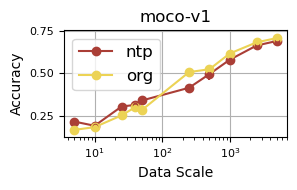

In [16]:
colors = ['#aa3e36', '#ecd355', '#2ca02c', '#d62728', '#9467bd']
figure = plt.figure(figsize=(3, 2))
std = np.std(list(ntp.values()), axis=1)
mean = np.mean(list(ntp.values()), axis=1)
# Set color mapping
cmap = plt.get_cmap('tab10')
plt.plot(list(ntp.keys()), mean, label=f"ntp", color=colors[0], marker="o")
# Draw the std using the bars
plt.errorbar(list(ntp.keys()), mean, yerr=std, fmt='.', color=colors[0])

std = np.std(list(org.values()), axis=1)
mean = np.mean(list(org.values()), axis=1)
# Set color mapping
cmap = plt.get_cmap('tab10')
plt.plot(list(org.keys()), mean, label=f"org", color=colors[1], marker="o")
# Draw the std using the bars
plt.errorbar(list(org.keys()), mean, yerr=std, fmt='.', color=colors[1])

# Set the text size 
plt.xlabel("Data Scale")
plt.ylabel("Accuracy")

# set fontsize 
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True)

# Set the x-axis to a log scale
plt.xscale('log')
plt.title(model_name)
plt.legend()
# Set the fontsize for labels 
plt.legend(fontsize=12)
# save figure in svg
plt.tight_layout()
plt.savefig(f"../../imgs/ntp_vs_org_{model_name}.svg", format="svg", dpi=1200)